In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%precision 3
pd.set_option('precision', 3)

In [31]:
df=pd.read_csv("/content/drive/MyDrive/bigdata/codes_for_05-07/stock/stock-data.csv")
df.head()

,date,nc_search,ceo_search,lineage_search,stock_search,stock_price
0,2021-03-21,10,44,38,4,932000
1,2021-03-28,20,31,39,20,834000
2,2021-04-04,14,15,36,10,885000
3,2021-04-11,10,23,31,6,906000
4,2021-04-18,11,10,32,6,894000


# 가설 : 회사의 이름보다 CEO의 이름을 검색량이 높을 때 주가에 영향을 더 미칠 것이다.

### 한 달 주기 데이터

In [32]:
df[:4].describe()

,nc_search,ceo_search,lineage_search,stock_search,stock_price
count,4.000,4.000,4.000,4.000,4.000
mean,13.500,28.250,36.000,10.000,889250.000
std,4.726,12.366,3.559,7.118,41548.165
min,10.000,15.000,31.000,4.000,834000.000
25%,10.000,21.000,34.750,5.500,872250.000
50%,12.000,27.000,37.000,8.000,895500.000
75%,15.500,34.250,38.250,12.500,912500.000
max,20.000,44.000,39.000,20.000,932000.000


In [33]:
df[4:8].describe()

,nc_search,ceo_search,lineage_search,stock_search,stock_price
count,4.00,4.000,4.000,4.000,4.000
mean,9.25,6.000,27.750,2.750,856250.000
std,1.50,3.559,2.986,2.217,30554.596
min,8.00,3.000,25.000,1.000,820000.000
25%,8.00,3.000,26.500,1.750,842500.000
50%,9.00,5.500,27.000,2.000,855500.000
75%,10.25,8.500,28.250,3.000,869250.000
max,11.00,10.000,32.000,6.000,894000.000


In [34]:
df[8:12].describe()

,nc_search,ceo_search,lineage_search,stock_search,stock_price
count,4.000,4.000,4.000,4.000,4.000
mean,7.250,10.250,28.750,4.250,847750.000
std,1.708,6.131,2.062,0.957,16580.611
min,5.000,3.000,26.000,3.000,823000.000
25%,6.500,8.250,28.250,3.750,846250.000
50%,7.500,10.000,29.000,4.500,855000.000
75%,8.250,12.000,29.500,5.000,856500.000
max,9.000,18.000,31.000,5.000,858000.000


In [35]:
df[12:16].describe()

,nc_search,ceo_search,lineage_search,stock_search,stock_price
count,4.000,4.000,4.000,4.000,4.000
mean,6.500,10.000,35.250,2.500,831750.000
std,1.291,2.449,4.031,1.291,12284.814
min,5.000,8.000,31.000,1.000,820000.000
25%,5.750,8.000,32.500,1.750,823750.000
50%,6.500,9.500,35.000,2.500,829500.000
75%,7.250,11.500,37.750,3.250,837500.000
max,8.000,13.000,40.000,4.000,848000.000


In [36]:
df[16:20].describe()

,nc_search,ceo_search,lineage_search,stock_search,stock_price
count,4.000,4.000,4.000,4.000,4.000
mean,6.500,17.500,26.000,4.750,802000.000
std,2.887,9.469,2.582,3.304,16062.378
min,3.000,8.000,23.000,1.000,778000.000
25%,5.250,11.750,24.500,2.500,801250.000
50%,6.500,16.000,26.000,5.000,809000.000
75%,7.750,21.750,27.500,7.250,809750.000
max,10.000,30.000,29.000,8.000,812000.000


In [37]:
df[20:24].describe()

,nc_search,ceo_search,lineage_search,stock_search,stock_price
count,4.000,4.000,4.000,4.000,4.000
mean,42.750,41.000,34.250,42.250,746250.000
std,41.668,30.321,2.986,47.374,95782.305
min,7.000,16.000,31.000,2.000,633000.000
25%,9.250,18.250,32.500,4.250,690000.000
50%,35.500,33.500,34.000,33.500,749500.000
75%,69.000,56.250,35.750,71.500,805750.000
max,93.000,81.000,38.000,100.000,853000.000


In [38]:
df[24:28].describe()

,nc_search,ceo_search,lineage_search,stock_search,stock_price
count,4.000,4.000,4.000,4.000,4.0
mean,67.000,54.500,31.000,67.250,585500.0
std,25.219,31.501,0.816,27.146,19000.0
min,42.000,31.000,30.000,40.000,571000.0
25%,51.000,34.750,30.750,47.500,571000.0
50%,63.000,43.500,31.000,65.000,580000.0
75%,79.000,63.250,31.250,84.750,594500.0
max,100.000,100.000,32.000,99.000,611000.0


In [39]:
df[28:32].describe()

,nc_search,ceo_search,lineage_search,stock_search,stock_price
count,4.000,4.000,4.000,4.000,4.000
mean,30.250,14.750,31.500,27.750,595500.000
std,15.435,12.997,1.732,15.414,29692.872
min,19.000,6.000,30.000,16.000,560000.000
25%,22.000,7.500,30.000,18.250,576500.000
50%,24.500,9.500,31.500,22.500,600500.000
75%,32.750,16.750,33.000,32.000,619500.000
max,53.000,34.000,33.000,50.000,621000.000


In [40]:
df[32:36].describe()

,nc_search,ceo_search,lineage_search,stock_search,stock_price
count,4.000,4.00,4.000,4.000,4.000
mean,48.750,27.50,76.750,48.250,710250.000
std,18.209,25.04,16.998,23.977,84854.287
min,25.000,14.00,60.000,18.000,595000.000
25%,39.250,14.00,67.500,34.500,673750.000
50%,53.000,15.50,73.500,53.500,730000.000
75%,62.500,29.00,82.750,67.250,766500.000
max,64.000,65.00,100.000,68.000,786000.000


In [41]:
df[36:40].describe()

,nc_search,ceo_search,lineage_search,stock_search,stock_price
count,4.00,4.000,4.000,4.00,4.000
mean,10.50,6.500,45.250,7.75,690750.000
std,2.38,2.646,5.123,1.50,33974.255
min,8.00,3.000,38.000,6.00,656000.000
25%,8.75,5.250,44.000,6.75,674000.000
50%,10.50,7.000,46.500,8.00,685000.000
75%,12.25,8.250,47.750,9.00,701750.000
max,13.00,9.000,50.000,9.00,737000.000


In [42]:
df[40:44].describe()

,nc_search,ceo_search,lineage_search,stock_search,stock_price
count,4.000,4.000,4.000,4.000,4.000
mean,8.500,5.000,38.250,6.500,599250.000
std,0.577,4.243,4.573,1.291,33648.923
min,8.000,0.000,32.000,5.000,565000.000
25%,8.000,2.250,37.250,5.750,578500.000
50%,8.500,5.500,39.000,6.500,594500.000
75%,9.000,8.250,40.000,7.250,615250.000
max,9.000,9.000,43.000,8.000,643000.000


In [43]:
df[44:48].describe()

,nc_search,ceo_search,lineage_search,stock_search,stock_price
count,4.00,4.000,4.000,4.000,4.000
mean,15.00,7.250,34.000,10.500,538250.000
std,4.69,4.717,1.155,2.517,23329.166
min,9.00,3.000,33.000,7.000,510000.000
25%,12.75,5.250,33.000,10.000,529500.000
50%,15.50,6.000,34.000,11.000,538000.000
75%,17.75,8.000,35.000,11.500,546750.000
max,20.00,14.000,35.000,13.000,567000.000


In [44]:
df[48:].describe()

,nc_search,ceo_search,lineage_search,stock_search,stock_price
count,4.000,4.000,4.000,4.000,4.00
mean,17.500,33.500,32.250,15.000,466875.00
std,5.745,44.493,1.708,5.477,17735.91
min,13.000,6.000,30.000,11.000,452000.00
25%,13.000,12.000,31.500,11.750,457625.00
50%,16.000,14.000,32.500,13.000,461500.00
75%,20.500,35.500,33.250,16.250,470750.00
max,25.000,100.000,34.000,23.000,492500.00


### 분기별로 봤을 때 CEO의 영향이 조금 더 높아보인다.

# 그래프

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
nc = df['nc_search']
ceo = df['ceo_search']
lineage = df['lineage_search']
stock = df['stock_search']
price = df['stock_price']
date = df['date']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


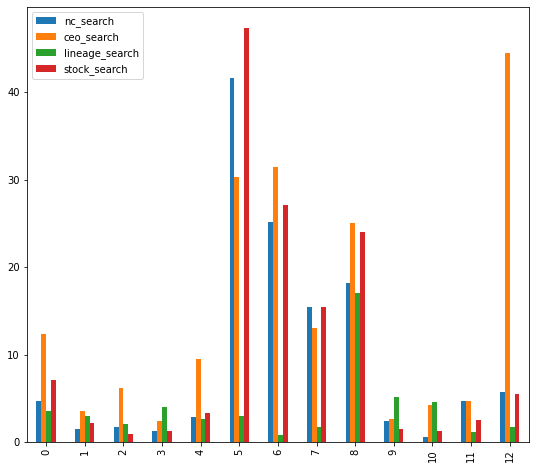

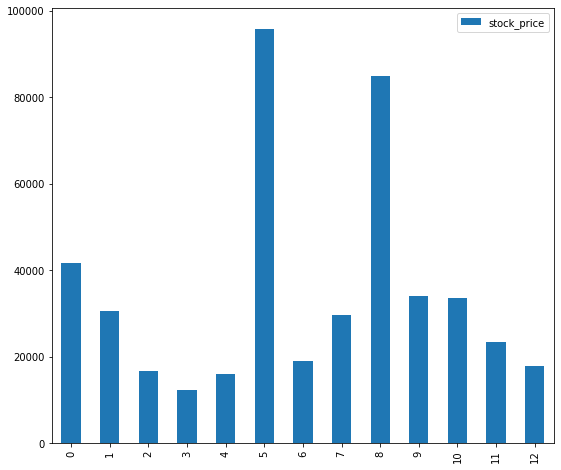

In [47]:
search_data = []
for i in range(0, 13):
    search_data += [df[i*4:(i+1)*4].std()]
search_data
search=pd.DataFrame(search_data)
search.plot(y=["nc_search", "ceo_search", "lineage_search", "stock_search"], kind="bar", figsize=(9,8))
search.plot(y=["stock_price"], kind="bar", figsize=(9,8))
plt.show()

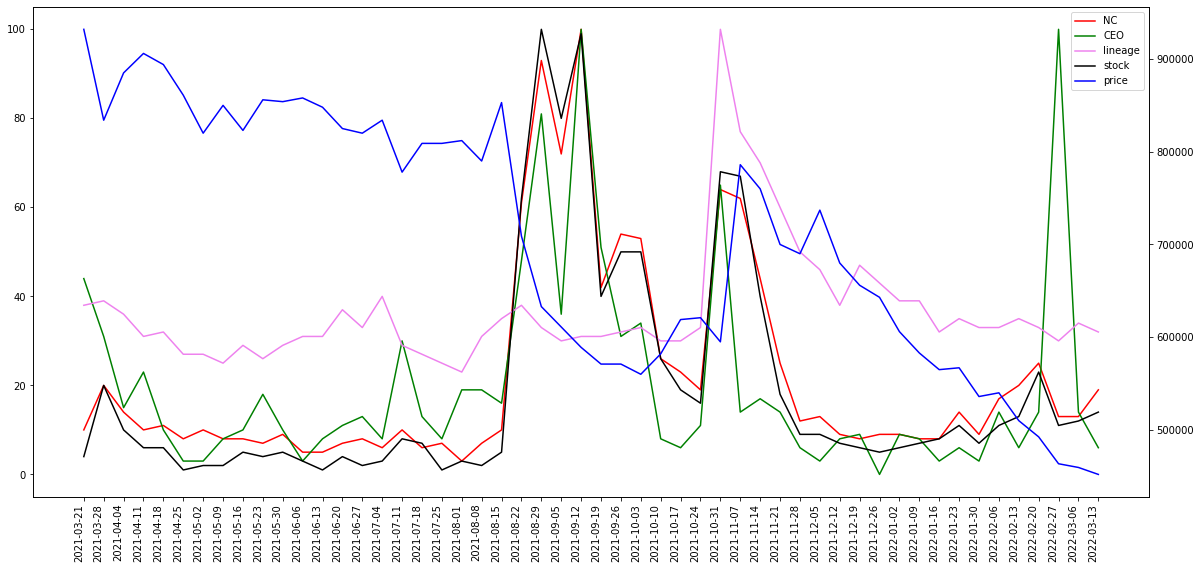

In [48]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
a, = ax1.plot(date, nc, color="red", label="NC")
b, = ax1.plot(date, ceo, color="green", label="CEO")
c, = ax1.plot(date, lineage, color="violet", label="lineage")
d, = ax1.plot(date, stock, color="black", label="stock")
e, = ax2.plot(date, price, color="blue", label="price")
p = [a, b, c, d, e] 
ax1.legend(p, [p_.get_label() for p_ in p])
fig.autofmt_xdate(rotation=90)
plt.show()

### 회사 명, CEO 이름 둘 다 검색량이 높아졌을 때 주가 변동 수치가 높아지는 것을 확인함.
### 회사에 관련 된 이름, 상품, 주가의 검색량이 거의 비슷하고 관련 된 것들이면 주가에 영향을 준다고 생각함.